In [1]:
# Install 'datasets' library for loading AG News dataset
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "L

In [2]:
# Text processing libraries
import nltk
import string
# Dataset handling
import pandas as pd
from datasets import load_dataset
# Feature extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# Train/test split
from sklearn.model_selection import train_test_split, GridSearchCV
# Evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
# Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
# NLP tools from NLTK
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
# Visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
# Utility
import numpy as np
import joblib

In [3]:
# Download required NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')
# Initialize stopword set and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [4]:
# Function to lowercase and remove punctuation from text
def preprocess(text):
  text = text.lower() # Convert to lowercase
  text = ''.join([char for char in text if char not in string.punctuation]) # Remove punctuation
  return text

In [5]:
# Load AG News dataset (4-class text classification) from Hugging Face Datasets
dataset = load_dataset('ag_news')
# Extract text and labels from the training split
texts = [item['text'] for item in dataset['train']]
labels = [item['label'] for item in dataset['train']]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/8.07k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/18.6M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/1.23M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

In [6]:
# Apply preprocessing to all training texts
cleaned_texts = [preprocess(t) for t in texts]

In [7]:
# Split dataset: 75% training, 25% testing
X_train, X_test, y_train, y_test = train_test_split(cleaned_texts, labels, test_size=0.25, random_state=42)

In [8]:
# Convert raw text to numerical features using TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,1), min_df=5, max_df=0.85)
# Fit on training data and transform both train and test data
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

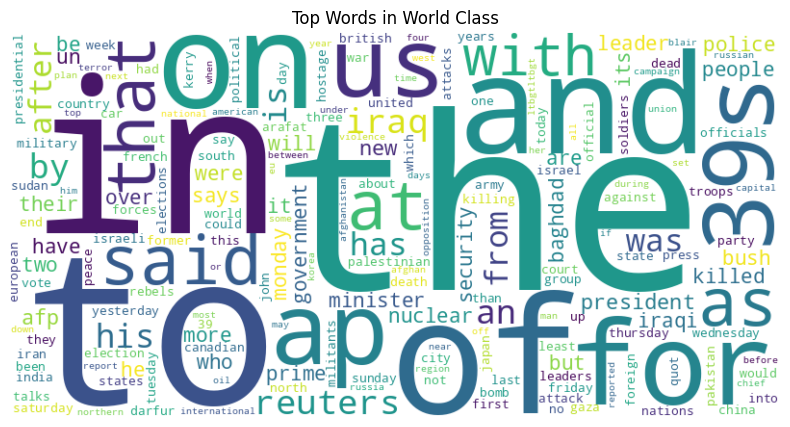

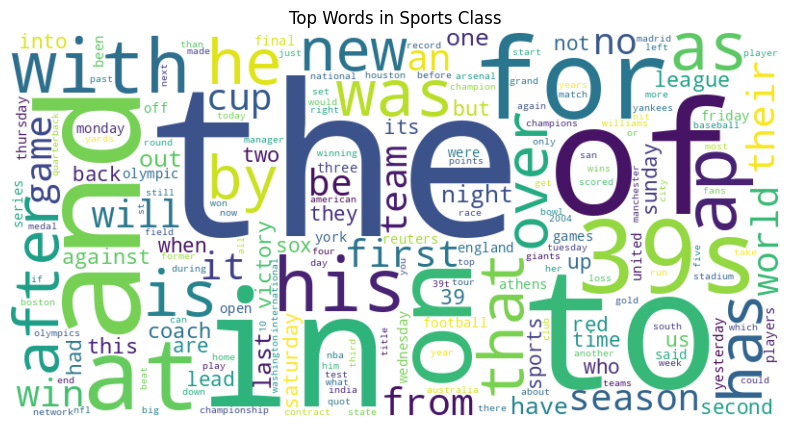

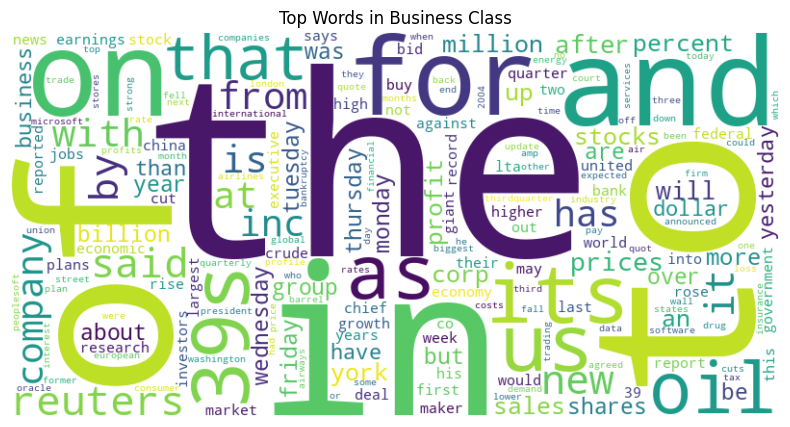

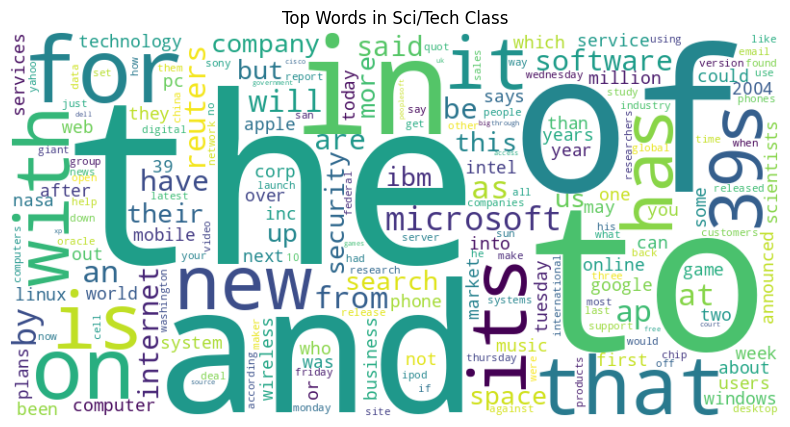

In [9]:
# Define class labels for AG News dataset
class_names = ['World', 'Sports', 'Business', 'Sci/Tech']

# Loop through each class and generate a word cloud based on average TF-IDF score
for class_id in range(4):
    # Select all documents belonging to the current class
    class_docs = [X_train[i] for i in range(len(y_train)) if y_train[i] == class_id]

    # Recompute TF-IDF features for documents in this class only
    tfidf = TfidfVectorizer(max_features=1000)
    X_tfidf = tfidf.fit_transform(class_docs)

    # Compute average TF-IDF score for each word across documents
    mean_tfidf = np.asarray(X_tfidf.mean(axis=0)).flatten()
    top_words = dict(zip(tfidf.get_feature_names_out(), mean_tfidf))

    # Create a word cloud from the top TF-IDF words
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_words)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Top Words in {class_names[class_id]} Class")
    plt.show()

In [10]:
# Initialize the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

In [11]:
# Train the Naive Bayes classifier on the TF-IDF vectorized training data and corresponding labels
nb_classifier.fit(X_train_vec, y_train)

MultinomialNB()

In [12]:
# Predict the class labels for the test data using the trained Naive Bayes model
y_pred = nb_classifier.predict(X_test_vec)

In [13]:
# Classification Report for Naive Bayes
report = classification_report(y_test, y_pred, target_names=['World', 'Sports', 'Business', 'Sci/Tech'])
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(report)

Accuracy: 0.8927333333333334

Classification Report:

              precision    recall  f1-score   support

       World       0.90      0.89      0.89      7472
      Sports       0.94      0.97      0.95      7560
    Business       0.86      0.85      0.86      7440
    Sci/Tech       0.87      0.86      0.86      7528

    accuracy                           0.89     30000
   macro avg       0.89      0.89      0.89     30000
weighted avg       0.89      0.89      0.89     30000



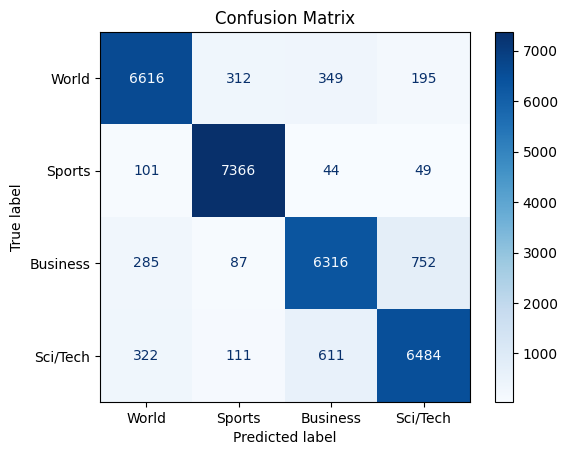

In [14]:
# Confusion matrix for Naive Bayes
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['World', 'Sports', 'Business', 'Sci/Tech'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [15]:
# Error analysis for Naive Bayes

# Identify misclassified indices for Naive Bayes model
misclassified_nb = np.where(np.array(y_test) != np.array(y_pred))[0]
# Display 5 example misclassified texts from Naive Bayes predictions
print(f"\n[Naive Bayes] Showing 5 misclassified examples ({len(misclassified_nb)} total):\n")
for i in misclassified_nb[:5]:
    print(f"Text: {X_test[i][:300]}...")
    print(f"True Label: {y_test[i]} | Predicted: {y_pred[i]}\n")


[Naive Bayes] Showing 5 misclassified examples (3218 total):

Text: google cuts its ipo price range san jose calif  in a sign that google incs initial public offering will not be as hot or big as expected the internet search giant slashed its estimated pershare price range and reduced the number of shares to be sold by insiders...
True Label: 0 | Predicted: 2

Text: netflix ceo rates blockbuster amazon threats reuters reuters  netflix inc chiefexecutive reed hastings said on friday that blockbuster inc hasmore to lose in the war for online dvd renters than emergingfoe amazoncom inc...
True Label: 3 | Predicted: 2

Text: construction spending hits alltime high washington  construction spending surged in august to the highest level on record while manufacturing grew at a slower pace in september offering mixed signals about the economys strength    the commerce department reported friday that the value of buildings p...
True Label: 0 | Predicted: 2

Text: alaska brown bears gather for a

In [16]:
# Hyperparameter tuning for Naive Bayes

# Define a grid of alpha values to search for the best Naive Bayes model
nb_params = {'alpha': [0.01, 0.1, 0.5, 1, 5]}
# Perform grid search with 5-fold cross-validation to find the best alpha
nb_grid = GridSearchCV(MultinomialNB(), nb_params, cv=5, scoring='accuracy')
nb_grid.fit(X_train_vec, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 5]}, scoring='accuracy')

In [17]:
# Tuned Naive Bayes Classification Report

# Output the best alpha value found and evaluate the tuned Naive Bayes model
print("Best parameters for Naive Bayes:", nb_grid.best_params_)
best_nb_model = nb_grid.best_estimator_
# Predict test labels using the tuned Naive Bayes model
y_pred_best_nb = best_nb_model.predict(X_test_vec)
print("Tuned Naive Bayes Classification Report:")
# Display classification report for the tuned model
print(classification_report(y_test, y_pred_best_nb, target_names=['World', 'Sports', 'Business', 'Sci/Tech']))

Best parameters for Naive Bayes: {'alpha': 0.01}
Tuned Naive Bayes Classification Report:
              precision    recall  f1-score   support

       World       0.90      0.89      0.89      7472
      Sports       0.94      0.97      0.96      7560
    Business       0.86      0.85      0.86      7440
    Sci/Tech       0.86      0.86      0.86      7528

    accuracy                           0.89     30000
   macro avg       0.89      0.89      0.89     30000
weighted avg       0.89      0.89      0.89     30000



In [18]:
# Initialize the Logistic Regression model with a higher iteration limit for better convergence
lr_model = LogisticRegression(max_iter=1000)
# Train the Logistic Regression model on the TF-IDF features
lr_model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

In [19]:
# Predict the test labels using the trained Logistic Regression model
y_pred_lr = lr_model.predict(X_test_vec)

In [20]:
# Classification Report for Logistic Regression
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['World', 'Sports', 'Business', 'Sci/Tech']))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

       World       0.92      0.89      0.91      7472
      Sports       0.95      0.97      0.96      7560
    Business       0.87      0.88      0.87      7440
    Sci/Tech       0.88      0.88      0.88      7528

    accuracy                           0.90     30000
   macro avg       0.90      0.90      0.90     30000
weighted avg       0.90      0.90      0.90     30000



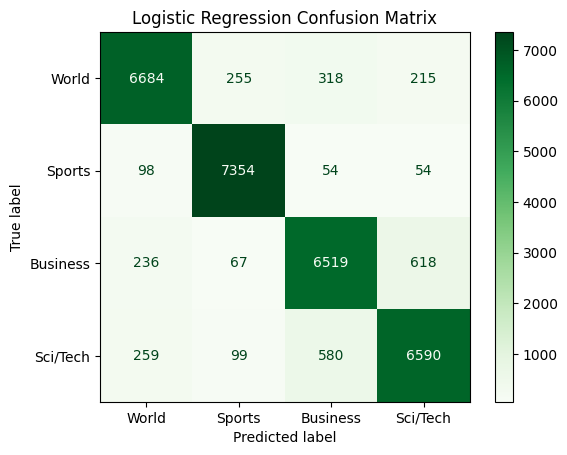

In [21]:
# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['World', 'Sports', 'Business', 'Sci/Tech'])
disp_lr.plot(cmap="Greens")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [22]:
# Error analysis for Logistic Regression

# Identify misclassified samples for Logistic Regression model
misclassified_lr = np.where(np.array(y_test) != np.array(y_pred_lr))[0]
# Print first 5 misclassified examples from Logistic Regression output
print(f"\n[Logistic Regression] Showing 5 misclassified examples ({len(misclassified_lr)} total):\n")
for i in misclassified_lr[:5]:
    print(f"Text: {X_test[i][:300]}...")
    print(f"True Label: {y_test[i]} | Predicted: {y_pred_lr[i]}\n")


[Logistic Regression] Showing 5 misclassified examples (2853 total):

Text: google cuts its ipo price range san jose calif  in a sign that google incs initial public offering will not be as hot or big as expected the internet search giant slashed its estimated pershare price range and reduced the number of shares to be sold by insiders...
True Label: 0 | Predicted: 2

Text: netflix ceo rates blockbuster amazon threats reuters reuters  netflix inc chiefexecutive reed hastings said on friday that blockbuster inc hasmore to lose in the war for online dvd renters than emergingfoe amazoncom inc...
True Label: 3 | Predicted: 2

Text: construction spending hits alltime high washington  construction spending surged in august to the highest level on record while manufacturing grew at a slower pace in september offering mixed signals about the economys strength    the commerce department reported friday that the value of buildings p...
True Label: 0 | Predicted: 2

Text: geminid meteor shower c

In [23]:
# Hyperparameter Tuning for Logistic Regression Model

# Define grid of regularization strengths for Logistic Regression
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
# Perform grid search with 5-fold cross-validation to find best C for LR
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_vec, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, scoring='accuracy')

In [24]:
# Tuned Logistic Regression Classification Report

# Get best C and evaluate the tuned Logistic Regression model
print("Best parameters for Logistic Regression:", grid.best_params_)
best_lr_model = grid.best_estimator_
# Predict using tuned LR model and print evaluation metrics
y_pred_best_lr = best_lr_model.predict(X_test_vec)
print("Tuned Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_best_lr, target_names=['World', 'Sports', 'Business', 'Sci/Tech']))

Best parameters for Logistic Regression: {'C': 1}
Tuned Logistic Regression Classification Report:
              precision    recall  f1-score   support

       World       0.92      0.89      0.91      7472
      Sports       0.95      0.97      0.96      7560
    Business       0.87      0.88      0.87      7440
    Sci/Tech       0.88      0.88      0.88      7528

    accuracy                           0.90     30000
   macro avg       0.90      0.90      0.90     30000
weighted avg       0.90      0.90      0.90     30000



In [25]:
# Initialize a Linear Support Vector Machine (SVM) model with increased iterations for complex data
svm_model = LinearSVC(max_iter=10000)
# Train the SVM model on the TF-IDF feature vectors
svm_model.fit(X_train_vec, y_train)
# Predict the labels of the test data using the trained SVM model
y_pred_svm = svm_model.predict(X_test_vec)

In [26]:
# Classification Report for SVM
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm, target_names=['World', 'Sports', 'Business', 'Sci/Tech']))

SVM Classification Report:
              precision    recall  f1-score   support

       World       0.92      0.89      0.91      7472
      Sports       0.95      0.97      0.96      7560
    Business       0.87      0.88      0.87      7440
    Sci/Tech       0.88      0.87      0.88      7528

    accuracy                           0.90     30000
   macro avg       0.90      0.90      0.90     30000
weighted avg       0.90      0.90      0.90     30000



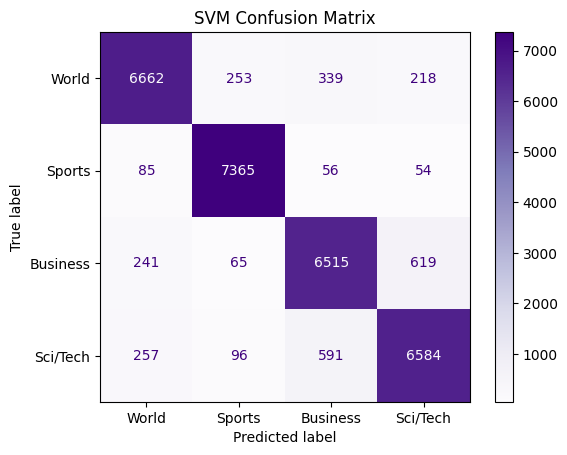

In [27]:
# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=['World', 'Sports', 'Business', 'Sci/Tech'])
disp_svm.plot(cmap="Purples")
plt.title("SVM Confusion Matrix")
plt.show()

In [28]:
# Error analysis for SVM

# Detect mismatches between true and predicted labels for SVM
misclassified_svm = np.where(np.array(y_test) != np.array(y_pred_svm))[0]
# Show 5 misclassified samples from SVM results
print(f"\n[SVM] Showing 5 misclassified examples ({len(misclassified_svm)} total):\n")
for i in misclassified_svm[:5]:
    print(f"Text: {X_test[i][:300]}...")
    print(f"True Label: {y_test[i]} | Predicted: {y_pred_svm[i]}\n")


[SVM] Showing 5 misclassified examples (2874 total):

Text: google cuts its ipo price range san jose calif  in a sign that google incs initial public offering will not be as hot or big as expected the internet search giant slashed its estimated pershare price range and reduced the number of shares to be sold by insiders...
True Label: 0 | Predicted: 2

Text: netflix ceo rates blockbuster amazon threats reuters reuters  netflix inc chiefexecutive reed hastings said on friday that blockbuster inc hasmore to lose in the war for online dvd renters than emergingfoe amazoncom inc...
True Label: 3 | Predicted: 2

Text: stop croc water swimming coroner the public still did not appreciate how frighteningly dangerous crocodiles were even after the fatal mauling of a german tourist two years ago a coroner said today...
True Label: 0 | Predicted: 2

Text: construction spending hits alltime high washington  construction spending surged in august to the highest level on record while manufacturing g

In [29]:
# Hyperparameter tuning for SVM
# Define a parameter grid for SVM's regularization parameter C
svm_params = {'C': [0.01, 0.1, 1, 10, 100]}
# Use GridSearchCV to find best SVM hyperparameter via 5-fold CV
svm_grid = GridSearchCV(LinearSVC(max_iter=10000), svm_params, cv=5, scoring='accuracy')
svm_grid.fit(X_train_vec, y_train)

GridSearchCV(cv=5, estimator=LinearSVC(max_iter=10000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, scoring='accuracy')

In [30]:
# Tuned SVM Classification Report
# Report best parameters and evaluate tuned SVM
print("Best parameters for SVM:", svm_grid.best_params_)
best_svm_model = svm_grid.best_estimator_
# Predict test labels using tuned SVM
y_pred_best_svm = best_svm_model.predict(X_test_vec)
print("Tuned SVM Classification Report:")
print(classification_report(y_test, y_pred_best_svm, target_names=['World', 'Sports', 'Business', 'Sci/Tech']))

Best parameters for SVM: {'C': 0.1}
Tuned SVM Classification Report:
              precision    recall  f1-score   support

       World       0.92      0.89      0.91      7472
      Sports       0.94      0.98      0.96      7560
    Business       0.88      0.88      0.88      7440
    Sci/Tech       0.89      0.88      0.88      7528

    accuracy                           0.91     30000
   macro avg       0.91      0.91      0.91     30000
weighted avg       0.91      0.91      0.91     30000



In [31]:
# # Compute accuracy scores for untuned models
nb_acc = accuracy_score(y_test, y_pred)
lr_acc = accuracy_score(y_test, y_pred_lr)
svm_acc = accuracy_score(y_test, y_pred_svm)

In [32]:
# Compute accuracy scores for tuned models
tuned_nb_acc = accuracy_score(y_test, y_pred_best_nb)
tuned_lr_acc = accuracy_score(y_test, y_pred_best_lr)
tuned_svm_acc = accuracy_score(y_test, y_pred_best_svm)

In [33]:
# Print individual model accuracies for comparison
print(f"Multinomial Naive Bayes Accuracy: {nb_acc:.4f}")
print(f"Logistic Regression Accuracy: {lr_acc:.4f}")
print(f"SVM Accuracy: {svm_acc:.4f}")

Multinomial Naive Bayes Accuracy: 0.8927
Logistic Regression Accuracy: 0.9049
SVM Accuracy: 0.9042


,Model,Accuracy
0,Naive Bayes (Untuned),0.8927
1,Naive Bayes (Tuned),0.8928
2,Logistic Regression (Untuned),0.9049
3,Logistic Regression (Tuned),0.9049
4,SVM (Untuned),0.9042
5,SVM (Tuned),0.9070


<ipython-input-34-96241a4f36e4>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Model", y="Accuracy", data=results_df, palette="Set2")


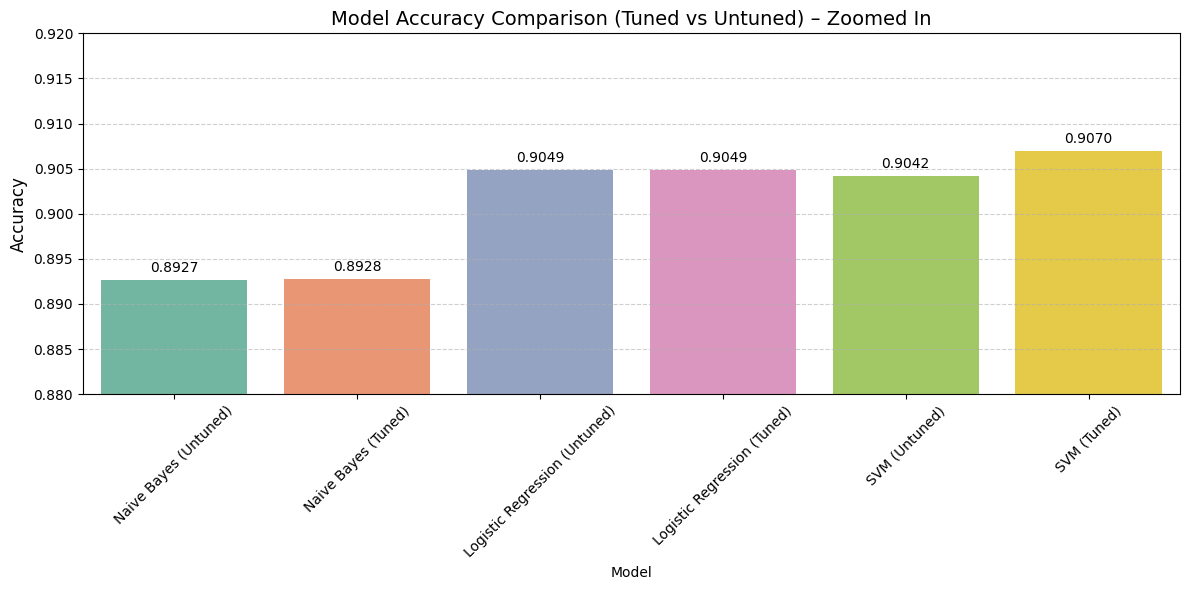

In [34]:
# Display Results
# Create and display DataFrame comparing tuned and untuned model performance
results = {
    "Model": [
        "Naive Bayes (Untuned)", "Naive Bayes (Tuned)",
        "Logistic Regression (Untuned)", "Logistic Regression (Tuned)",
        "SVM (Untuned)", "SVM (Tuned)"
    ],
    "Accuracy": [
        nb_acc, tuned_nb_acc,
        lr_acc, tuned_lr_acc,
        svm_acc, tuned_svm_acc
    ]
}

results_df = pd.DataFrame(results)
results_df["Accuracy"] = results_df["Accuracy"].round(4)
display(results_df)

# Plot: Zoomed-in accuracy comparison for tuned & untuned models
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Model", y="Accuracy", data=results_df, palette="Set2")

# Show exact values on top of bars
for i, acc in enumerate(results_df["Accuracy"]):
    ax.text(i, acc + 0.0005, f"{acc:.4f}", ha='center', va='bottom', fontsize=10)

# Zoom in on the accuracy range to highlight small differences
plt.ylim(0.88, 0.92)
plt.title("Model Accuracy Comparison (Tuned vs Untuned) – Zoomed In", fontsize=14)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()